In [1]:
%matplotlib widget
import pandas as pd

In [2]:
# df = data_frame
df = pd.read_excel('../data/Laplacian-IteravePartialDiffEq.xlsx', header=None)

In [3]:
laplacian_arr = np.asarray(df)

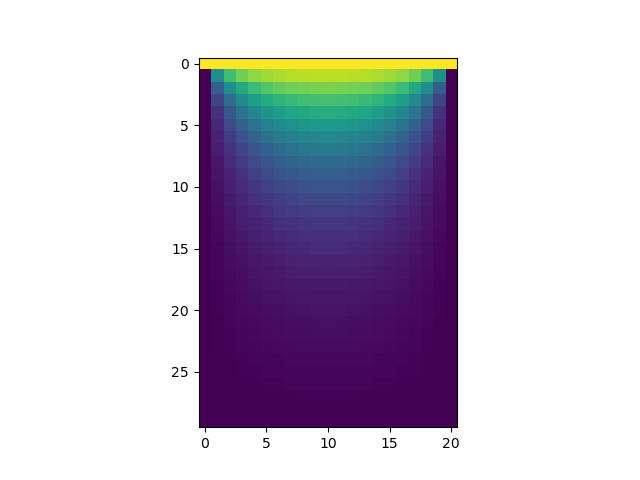

In [4]:
fig0, ax0 = plt.subplots()
ax0.imshow(laplacian_arr)

In [5]:
lp_length = laplacian_arr.shape[1]
lp_width = laplacian_arr.shape[0]

In [6]:
x, y = np.meshgrid(np.arange(lp_length), np.arange(lp_width))

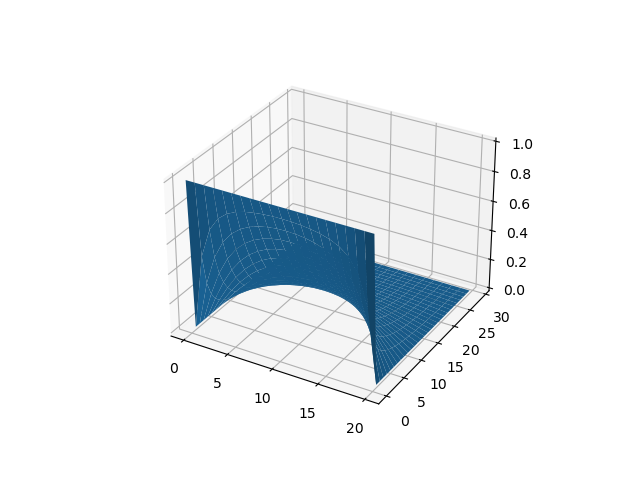

In [7]:
fig1, ax1 = plt.subplots(subplot_kw={"projection":"3d"})
ax1.plot_surface(x,y,laplacian_arr)

In [9]:
M = 100 #grid size
V = 1.0 # voltage

target = 2**-16 # target accuracy

In [14]:
phi = np.zeros([M+1, M+1], float) # voltage EVERYWHERE initialized to 0

phi[0,:] = V # [0,:] = SelectAll

phi_prime = np.empty([M+1, M+1], float)

In [20]:
delta = 1.0
while delta > target: # goal: index through every row and every "cell"
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M: # we don't want to change boundries when i=0, i=m, j=0, j=m
                phi_prime[i, j] = phi[i, j]
            else:
                phi_prime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 # else phi_prime = average of adjacent "cells"
    delta = np.max(np.abs(phi-phi_prime)) # maximum difference
    phi, phi_prime = phi_prime, phi

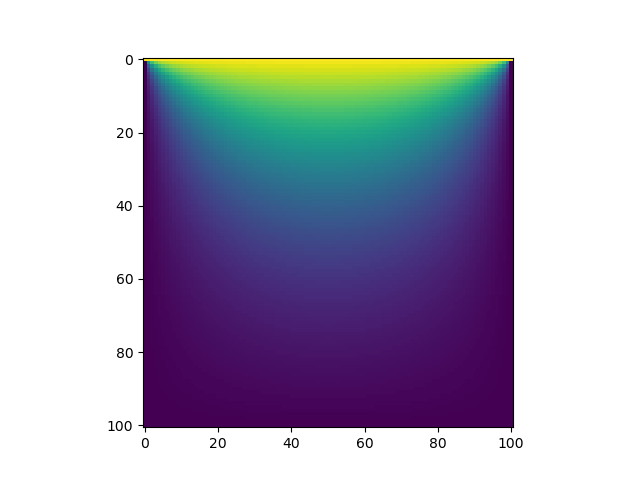

In [28]:
fig2, ax2 = plt.subplots()
ax2.imshow(phi)